<a href="https://colab.research.google.com/github/Vinther07/8-kyu-Find-the-smallest-integer-in-the-array/blob/main/Mit_Portef%C3%B8lge_v%C3%A6rkt%C3%B8j_Gem_som_kopi_f%C3%B8r_%C3%A6ndre_aktier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This is a Python program for finance
# This program will show you how to compute portfolio simple returns, get dayly returns and volatility.

In [ ]:
# Import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# >> Here is where you change the stock symbols <<
# Get the stocks symnols for the portfolio
# FAANG - FaceBook, Apple, Amazon, Netflix, Google.
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG", "TSLA", "MSFT", "O"]

In [ ]:
# >> Here is where you change the starting date of your portfolio <<
# Get the stock starting date
stockStartDate = '2013-01-01'

In [ ]:
# Get todays date and format it in the form YYYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')

print(today)

2020-11-29


In [ ]:
# Get the number of asserts in the portfolio
numAssets = len(stockSymbols)
print('You have '+ str(numAssets) +' assets in your portfolio')

You have 8 assets in your portfolio


In [ ]:
# Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks= stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
  return data

In [ ]:
# Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT,O
Date,,,,,,,,
2013-01-02,28.000000,257.309998,16.926661,13.144286,360.274597,7.072000,23.180780,28.699902
2013-01-03,27.770000,258.480011,16.713015,13.798572,360.483826,6.954000,22.870243,28.616125
2013-01-04,28.760000,259.149994,16.247477,13.711429,367.607117,6.880000,22.442219,28.853476
2013-01-07,29.420000,268.459991,16.151909,14.171429,366.003143,6.868000,22.400255,29.146694
2013-01-08,29.059999,266.380005,16.195379,13.880000,365.280823,6.736000,22.282753,29.272356
...,...,...,...,...,...,...,...,...
2020-11-20,269.700012,3099.399902,117.339996,488.239990,1742.189941,489.609985,210.389999,60.389999
2020-11-23,268.429993,3098.389893,113.849998,476.619995,1734.859985,521.849976,210.110001,60.889999
2020-11-24,276.920013,3118.060059,115.169998,482.880005,1768.880005,555.380005,213.860001,61.840000


In [ ]:
# Create a function to visualize the portfolio
def showGraph(stocks= stockSymbols, start=stockStartDate, end=today, col='Adj Close'):

  # Create a title for the portfolio
  title = 'Portfolio '+col+' Price History'

  # Get the stocks
  my_stocks = getMyPortfolio(stocks = stocks, start = start, end = end, col = col)

  # Give the figure size
  plt.figure(figsize=(12.2, 4.5))

  #Loop through each stock and plot the price
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)

  plt.title(title)
  plt.xlabel('Date', fontsize = 18)
  plt.ylabel(col + ' USD ($)', fontsize = 18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()

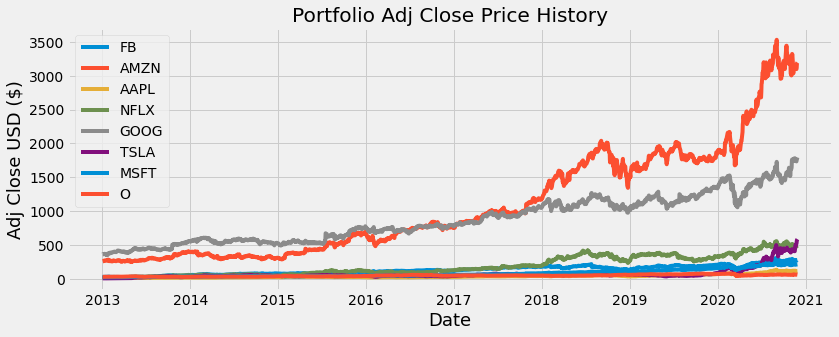

In [ ]:
# Shot the adjusted close price for FAANG stocks
showGraph(stockSymbols)

In [ ]:
# Calculate the simple returns
daily_simple_returns = my_stocks.pct_change(1)

# Show the daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT,O
Date,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581,-0.016686,-0.013396,-0.002919
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760,-0.010641,-0.018715,0.008294
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363,-0.001744,-0.001870,0.010162
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974,-0.019220,-0.005246,0.004311
...,...,...,...,...,...,...,...,...
2020-11-20,-0.011871,-0.005653,-0.010958,0.007366,-0.012319,-0.019348,-0.009557,-0.011782
2020-11-23,-0.004709,-0.000326,-0.029743,-0.023800,-0.004207,0.065848,-0.001331,0.008280
2020-11-24,0.031628,0.006349,0.011594,0.013134,0.019610,0.064252,0.017848,0.015602


In [ ]:
# Show the stock coralation
# A correlation of 1.0000 is a perfect coralation
# A corralation of -1.000 will be stock a moves up 1% while stock b moves down (-1%)
daily_simple_returns.corr()


Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT,O
Symbols,,,,,,,,
FB,1.000000,0.520879,0.455228,0.357169,0.569417,0.300464,0.481694,0.247450
AMZN,0.520879,1.000000,0.454606,0.449416,0.606711,0.331538,0.559956,0.174344
AAPL,0.455228,0.454606,1.000000,0.267404,0.526728,0.313848,0.584982,0.262733
NFLX,0.357169,0.449416,0.267404,1.000000,0.413094,0.287460,0.369760,0.095756
GOOG,0.569417,0.606711,0.526728,0.413094,1.000000,0.329341,0.660710,0.295190
TSLA,0.300464,0.331538,0.313848,0.287460,0.329341,1.000000,0.342522,0.235854
MSFT,0.481694,0.559956,0.584982,0.369760,0.660710,0.342522,1.000000,0.343734
O,0.247450,0.174344,0.262733,0.095756,0.295190,0.235854,0.343734,1.000000


In [ ]:
# Show the covariance matric for simple returns
# Measures how far each number is from the sets mean. 
# The higher the number the more volitile from the mean (risk for some.)
# The lower the number the less vollitile the stock will be out of the set, it might also give less returns.
# You can see how the stocks in the portfolio is volitile compared to the others.
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT,O
Symbols,,,,,,,,
FB,0.000474,0.000220,0.000179,0.000226,0.000201,0.000231,0.000176,0.000093
AMZN,0.000220,0.000376,0.000159,0.000253,0.000191,0.000227,0.000182,0.000058
AAPL,0.000179,0.000159,0.000325,0.000140,0.000154,0.000200,0.000177,0.000081
NFLX,0.000226,0.000253,0.000140,0.000842,0.000195,0.000295,0.000180,0.000048
GOOG,0.000201,0.000191,0.000154,0.000195,0.000263,0.000189,0.000180,0.000082
TSLA,0.000231,0.000227,0.000200,0.000295,0.000189,0.001248,0.000203,0.000143
MSFT,0.000176,0.000182,0.000177,0.000180,0.000180,0.000203,0.000281,0.000099
O,0.000093,0.000058,0.000081,0.000048,0.000082,0.000143,0.000099,0.000296


In [ ]:
# Show the variance of one stock compared to the mean of the stock portfolio
daily_simple_returns.var()

Symbols
FB      0.000474
AMZN    0.000376
AAPL    0.000325
NFLX    0.000842
GOOG    0.000263
TSLA    0.001248
MSFT    0.000281
O       0.000296
dtype: float64

In [ ]:
# Print the standard deviation for daily simple returns
# High number = more volitile
# Low number  = less volitile 
# Buy high volatile stocks when they are low for max returns.
# Buy low volatile stocks when they are low for max safety.

print("The stock volatility: ")
daily_simple_returns.std()

The stock volatility: 


Symbols
FB      0.021774
AMZN    0.019394
AAPL    0.018018
NFLX    0.029024
GOOG    0.016229
TSLA    0.035329
MSFT    0.016749
O       0.017216
dtype: float64

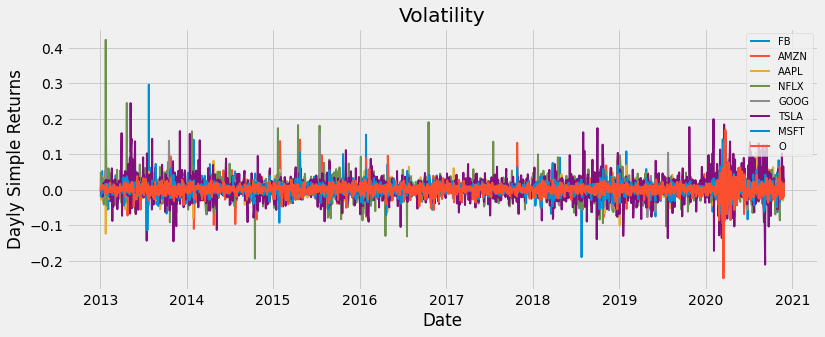

In [ ]:
# Visualize the stocks dayly simple returns / Volatility
plt.figure(figsize=(12, 4.5))

# Loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)

# Create a legend
plt.legend(loc='upper right', fontsize = 10)
plt.title('Volatility')
plt.ylabel('Dayly Simple Returns')
plt.xlabel('Date')
plt.show()

In [ ]:
# Show the mean of the daily simple return
# Will show you the mean daily return you would have gotten since the starting date. 
# Higher is better. Past preformance is not a promise of future returns.
# Return in percentage.
daylyMeanSimpleReturns = daily_simple_returns.mean()

print("The daily simple mean return ")
print(daylyMeanSimpleReturns)

The daily simple mean return 
Symbols
FB      0.001387
AMZN    0.001453
AAPL    0.001133
NFLX    0.002227
GOOG    0.000937
TSLA    0.002839
MSFT    0.001260
O       0.000537
dtype: float64


In [ ]:
# >> Here is where you chance the percentage stock weight of the portfolio <<
# Calculate the expected portfolio daily return
# Change the weights in np.array
randomWeights = np.array([0.1, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1, 0.1]) # current set to: (40% FB, 10% AMZN, 30% APPL, 10% NFLX, 10% GOOG, Tesla , MSFT) opdater ticker symbol og vægt i procent.
 
portfolioSimpleReturn = np.sum(daylyMeanSimpleReturns * randomWeights)
 
# Print the expected portfolio return
print('The daily expected portfolio return: '+ str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0013843046890402463


In [ ]:
# Get the yearly simple return
# If you want you can *100 for percenteges | 0.3385 = 33,85% yearly return. 
print("The expected annualized portfolio simple return: " + str(portfolioSimpleReturn * 253))

The expected annualized portfolio simple return: 0.3502290863271823


In [ ]:
# Calculate the growth of the investment
# Shows the growth of the portfolio for each stock on a dayli basis. 
# Remember you can * 100 to get the percentage gain eg. 1.02 = growth of 2%   or  4.20 = 420% gain.
dailyTotalSimpleReturn = (daily_simple_returns+1).cumprod()

# Show the cumulative return
dailyTotalSimpleReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT,O
Date,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581,0.983314,0.986604,0.997081
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353,0.972851,0.968139,1.005351
2013-01-07,1.050714,1.043333,0.954229,1.078144,1.015900,0.971154,0.966329,1.015568
2013-01-08,1.037857,1.035249,0.956797,1.055972,1.013896,0.952489,0.961260,1.019946
...,...,...,...,...,...,...,...,...
2020-11-20,9.632143,12.045392,6.932259,37.144656,4.835728,69.232181,9.076053,2.104188
2020-11-23,9.586785,12.041467,6.726076,36.260622,4.815382,73.791003,9.063974,2.121610
2020-11-24,9.890000,12.117913,6.804059,36.736876,4.909811,78.532240,9.225746,2.154711


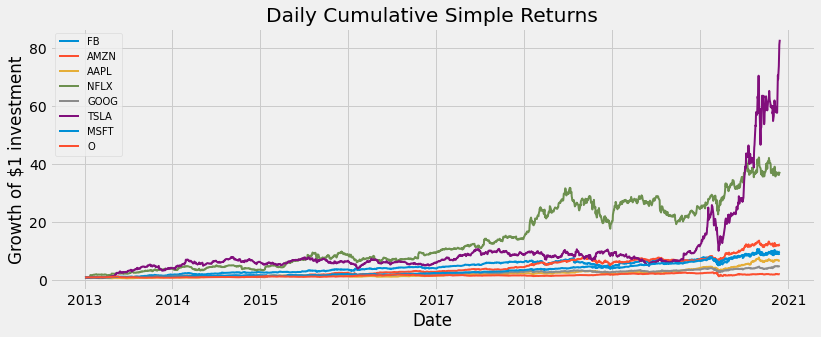

In [ ]:
# Visualize the daily cumulative simple return

plt.figure(figsize=(12.2, 4.5))
for c in dailyTotalSimpleReturn.columns.values:
  plt.plot(dailyTotalSimpleReturn.index, dailyTotalSimpleReturn[c], lw=2, label = c)

plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment') 
plt.title('Daily Cumulative Simple Returns')
plt.show()
